<a href="https://colab.research.google.com/github/walleceoli/Alura_Store/blob/main/Challenge_Alura_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando os dados e bibliotecas

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

#Loja 1

## Conhecendo os dados

### Verificando informações do DataFrame

In [278]:
loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [279]:
loja1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [280]:
loja1.shape

(2359, 12)

### Estatisticas descritivas

In [158]:
loja1.describe()

,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,650.491361,34.691805,3.976685,2.943196,-20.763366,-47.349385
std,819.582778,43.814183,1.415370,2.819897,5.372400,4.183180
min,10.070000,0.000000,1.000000,1.000000,-30.170000,-70.550000
25%,74.345000,4.141783,3.000000,1.000000,-22.250000,-48.790000
50%,313.750000,16.498835,5.000000,1.000000,-22.190000,-48.790000
75%,904.130000,48.050074,5.000000,4.000000,-18.100000,-44.380000
max,3969.380000,214.377060,5.000000,24.000000,1.410000,-36.590000


###  Valores nulos e duplicados

In [159]:
loja1.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


In [160]:
loja1.duplicated().sum()

np.int64(0)

##Analisando os dados

###  Calculando o faturamento total de cada loja.

In [161]:
faturamento_loja1 = loja1['Preço'].sum()
print(f'Faturamento loja1 R${faturamento_loja1:,.2f}')

Faturamento loja1 R$1,534,509.12


###  Calculando a quantidade de produtos vendidos por categoria em cada loja

In [162]:
qtd_vendas_cat_loja1 = loja1['Categoria do Produto'].value_counts()
qtd_vendas_cat_loja1

,count
Categoria do Produto,
moveis,465
eletronicos,448
brinquedos,324
eletrodomesticos,312
esporte e lazer,284
instrumentos musicais,182
livros,173
utilidades domesticas,171


###  Calculando a média das avaliações dos clientes para cada loja.

In [163]:
avaliacao_cliente_loja1 = loja1['Avaliação da compra'].mean()
print(f'{avaliacao_cliente_loja1:.2f}')

3.98


### Identificando quais produtos foram os mais vendidos e os menos vendidos em cada loja

In [256]:
vendas_por_produto = loja1['Produto'].value_counts()

produtos_mais_vendidos_loja1 = vendas_por_produto.nlargest()
produtos_menos_vendidos_loja1 = vendas_por_produto.nsmallest()

produtos_mais_vendidos_loja1 = produtos_mais_vendidos_loja1.to_frame(name = 'Produtos mais vendidos loja 1')
produtos_menos_vendidos_loja1 = produtos_menos_vendidos_loja1.to_frame(name = 'Produtos menos vendidos loja 1')

Produtos mais vendidos

In [257]:
produtos_mais_vendidos_loja1.head()

,Produtos mais vendidos loja 1
Produto,
Micro-ondas,60
TV Led UHD 4K,60
Guarda roupas,60
Secadora de roupas,58
Cômoda,56


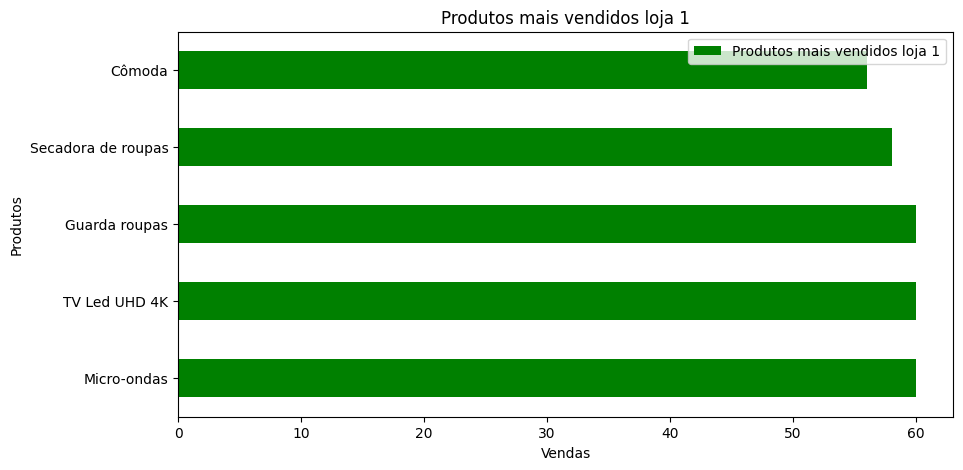

In [258]:
produtos_mais_vendidos_loja1.plot(kind='barh', figsize=(10,5), color='green', title= 'Produtos mais vendidos loja 1')
plt.xlabel('Vendas')
plt.ylabel('Produtos')
plt.show()

Produtos menos vendidos

In [259]:
produtos_menos_vendidos_loja1.head()

,Produtos menos vendidos loja 1
Produto,
Headset,33
Celular ABXY,33
Panela de pressão,35
Pandeiro,36
Mochila,39


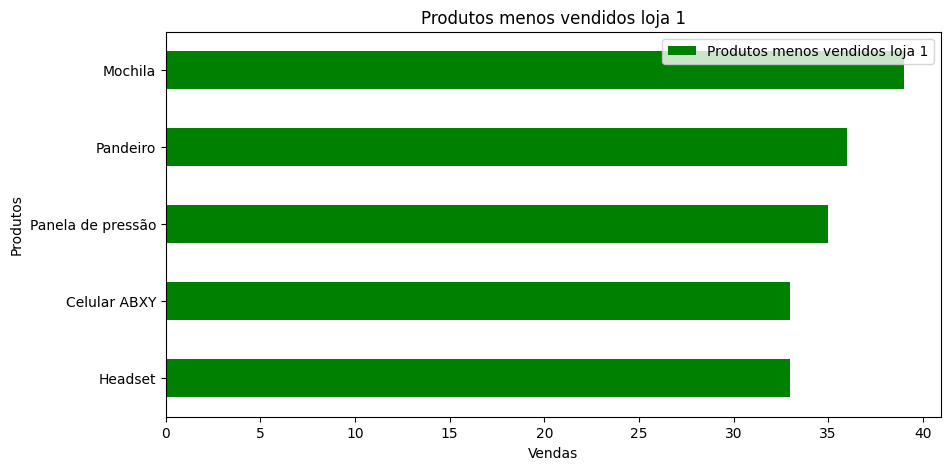

In [260]:
produtos_menos_vendidos_loja1.plot(kind='barh', figsize=(10,5), color='green', title= 'Produtos menos vendidos loja 1')
plt.xlabel('Vendas')
plt.ylabel('Produtos')
plt.show()

### Calculando o custo médio de frete para cada loja.

In [276]:
media_custo_frete_loja1 = loja1['Frete'].mean()
print(f'Custo médio do frete loja1: R${media_custo_frete_loja1:,.2f}')

Custo médio do frete loja1: R$34.69


#Loja 2

## Conhecendo os dados

###  Verificando informações do DataFrame

In [167]:
loja2.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Cadeira de escritório,moveis,378.20,20.421138,04/08/2021,Thiago Silva,MG,1,boleto,1,-18.10,-44.38
1,Pandeiro,instrumentos musicais,102.37,3.035334,26/11/2020,Bianca Santos,RJ,3,cartao_credito,4,-22.25,-42.66
2,Cama king,moveis,591.13,31.759020,22/10/2021,Thiago Silva,SC,5,cartao_credito,10,-27.45,-50.95
3,Cama king,moveis,1208.24,61.919584,04/05/2022,Larissa Alves,RS,5,cartao_credito,10,-30.17,-53.50
4,Cadeira de escritório,moveis,530.41,25.827176,26/02/2022,Lucas Oliveira,SP,4,cartao_credito,3,-22.19,-48.79


In [168]:
loja2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [169]:
loja2.shape

(2359, 12)

###  Estatisticas descritivas

In [170]:
loja2.describe()

,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,630.970352,33.621941,4.037304,2.902501,-20.473243,-47.098508
std,794.078997,42.321932,1.356153,2.848416,5.321015,4.169111
min,10.160000,0.000000,1.000000,1.000000,-30.170000,-70.550000
25%,72.730000,3.904020,4.000000,1.000000,-22.250000,-48.790000
50%,290.960000,15.406740,5.000000,1.000000,-22.190000,-48.790000
75%,903.580000,47.250196,5.000000,4.000000,-18.100000,-44.380000
max,3937.850000,216.707633,5.000000,24.000000,1.990000,-36.590000


###  Valores nulos e duplicados

In [171]:
loja2.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


In [172]:
loja2.duplicated().sum()

np.int64(0)

## Analisando os dados

###  Calculando o faturamento total de cada loja.

In [173]:
faturamento_loja2 = loja2['Preço'].sum()
print(f'Faturamento loja2 R${faturamento_loja2:,.2f}')

Faturamento loja2 R$1,488,459.06


###  Calculando a quantidade de produtos vendidos por categoria em cada loja

In [174]:
qtd_vendas_cat_loja2 = loja2['Categoria do Produto'].value_counts()
qtd_vendas_cat_loja2

,count
Categoria do Produto,
moveis,442
eletronicos,422
brinquedos,313
eletrodomesticos,305
esporte e lazer,275
instrumentos musicais,224
livros,197
utilidades domesticas,181


###  Calculando a média das avaliações dos clientes para cada loja.

In [175]:
avaliacao_cliente_loja2 = loja2['Avaliação da compra'].mean()
print(f'{avaliacao_cliente_loja2:.2f}')

4.04


###  identificando quais produtos foram os mais vendidos e os menos vendidos em cada loja

In [233]:
vendas_por_produto_loja2 = loja2['Produto'].value_counts()

produtos_mais_vendidos_loja2 = vendas_por_produto_loja2.nlargest()
produtos_menos_vendidos_loja2 = vendas_por_produto_loja2.nsmallest()

produtos_mais_vendidos_loja2 = produtos_mais_vendidos_loja2.to_frame(name = 'Produtos mais vendidos loja 2')
produtos_menos_vendidos_loja2 = produtos_menos_vendidos_loja2.to_frame(name = 'Produtos menos vendidos loja 2')

Produtos mais vendidos

In [234]:
produtos_mais_vendidos_loja2

,Produtos mais vendidos loja 2
Produto,
Iniciando em programação,65
Micro-ondas,62
Bateria,61
Violão,58
Pandeiro,58


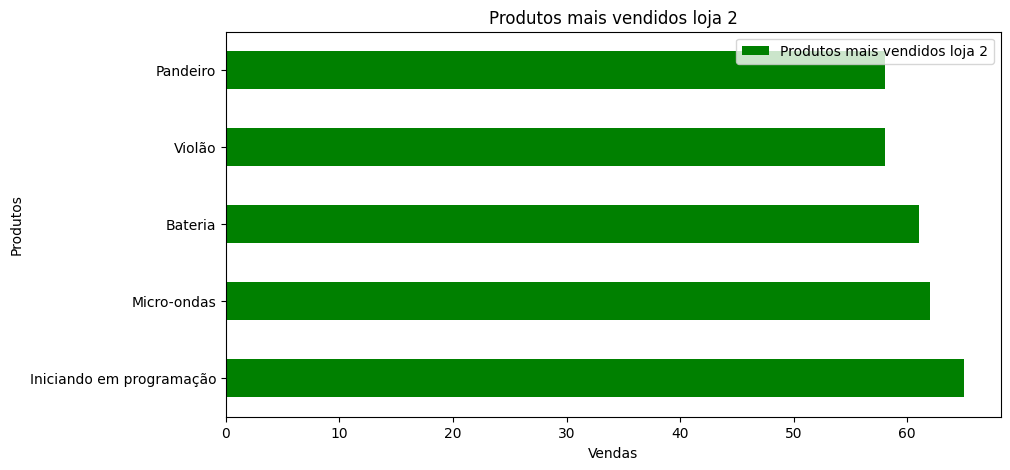

In [262]:
produtos_mais_vendidos_loja2.plot(kind='barh', figsize=(10,5), color='green', title= 'Produtos mais vendidos loja 2')
plt.xlabel('Vendas')
plt.ylabel('Produtos')
plt.show()

Produtos menos vendidos

In [235]:
produtos_menos_vendidos_loja2

,Produtos menos vendidos loja 2
Produto,
Jogo de tabuleiro,32
Mesa de jantar,34
Impressora,34
Poltrona,35
Fone de ouvido,37


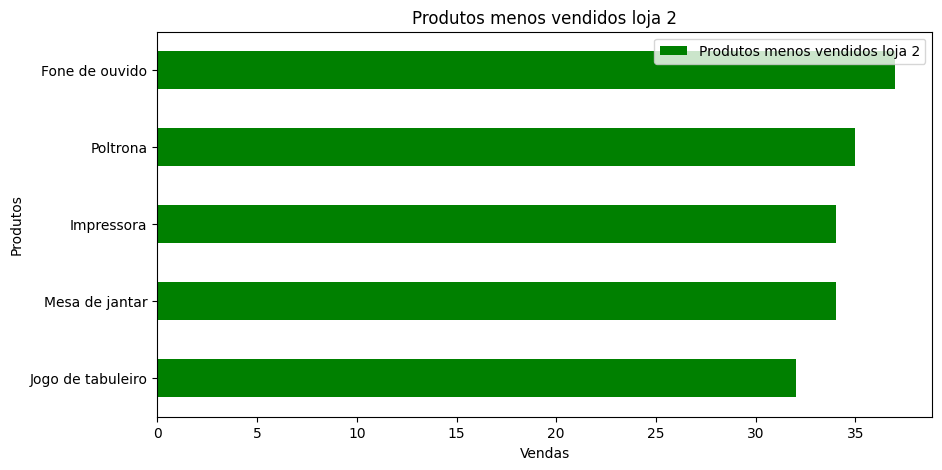

In [263]:
produtos_menos_vendidos_loja2.plot(kind='barh', figsize=(10,5), color='green', title= 'Produtos menos vendidos loja 2')
plt.xlabel('Vendas')
plt.ylabel('Produtos')
plt.show()

###  Calculando o custo médio de frete para cada loja.

In [275]:
media_custo_frete_loja2 = loja2['Frete'].mean()
print(f'Custo médio do frete loja2: R${media_custo_frete_loja2:,.2f}')

Custo médio do frete loja2: R$33.62


# Loja 3

##Conhecendo os dados

###  Verificando informações do DataFrame

In [179]:
loja3.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Secadora de roupas,eletrodomesticos,1713.50,88.823159,17/12/2021,Camila Ribeiro,CE,4,cartao_credito,4,-5.20,-39.53
1,Cômoda,moveis,386.81,18.180908,10/02/2021,Larissa Alves,RS,3,cartao_credito,1,-30.17,-53.50
2,Violão,instrumentos musicais,404.62,23.197592,22/01/2023,Lucas Oliveira,SP,5,cartao_credito,3,-22.19,-48.79
3,Bola de vôlei,esporte e lazer,78.40,4.463341,22/03/2022,Pedro Gomes,BA,4,cartao_credito,6,-13.29,-41.71
4,Guarda roupas,moveis,694.76,34.578319,12/01/2022,Bianca Santos,SP,1,cartao_credito,1,-22.19,-48.79


In [180]:
loja3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [181]:
loja3.shape

(2359, 12)

###  Estatisticas descritivas

In [182]:
loja3.describe()

,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,620.612560,33.074464,4.048326,2.967783,-20.405396,-47.129233
std,774.191691,41.260516,1.386426,2.812153,5.465572,4.197520
min,10.080000,0.000000,1.000000,1.000000,-30.170000,-70.550000
25%,76.560000,4.149261,4.000000,1.000000,-22.250000,-48.790000
50%,301.670000,15.879702,5.000000,2.000000,-22.190000,-48.790000
75%,888.040000,46.635503,5.000000,4.000000,-18.100000,-44.380000
max,3957.620000,211.257624,5.000000,24.000000,1.990000,-36.590000


###  Valores nulos e duplicados

In [183]:
loja3.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


In [184]:
loja3.duplicated().sum()

np.int64(0)

## Analisando os dados

###  Calculando o faturamento total de cada loja.

In [185]:
faturamento_loja3 = loja3['Preço'].sum()
print(f'Faturamento loja3 R${faturamento_loja3:,.2f}')

Faturamento loja3 R$1,464,025.03


###  Calculando a quantidade de produtos vendidos por categoria em cada loja

In [186]:
qtd_vendas_cat_loja3 = loja3['Categoria do Produto'].value_counts()
qtd_vendas_cat_loja3

,count
Categoria do Produto,
moveis,499
eletronicos,451
brinquedos,315
eletrodomesticos,278
esporte e lazer,277
livros,185
instrumentos musicais,177
utilidades domesticas,177


###  Calculando a média das avaliações dos clientes para cada loja.

In [187]:
avaliacao_cliente_loja3 = loja3['Avaliação da compra'].mean()
print(f'{avaliacao_cliente_loja3:.2f}')

4.05


###  Identificando quais produtos foram os mais vendidos e os menos vendidos em cada loja

In [230]:
vendas_por_produto_loja3 = loja3['Produto'].value_counts()

produtos_mais_vendidos_loja3 = vendas_por_produto_loja3.nlargest()
produtos_menos_vendidos_loja3 = vendas_por_produto_loja3.nsmallest()

produtos_mais_vendidos_loja3 = produtos_mais_vendidos_loja3.to_frame(name = 'Produtos mais vendidos loja 3')
produtos_menos_vendidos_loja3 = produtos_menos_vendidos_loja3.to_frame(name = 'Produtos menos vendidos loja 3')

Produtos mais vendidos

In [231]:
produtos_mais_vendidos_loja3

,Produtos mais vendidos loja 3
Produto,
Kit banquetas,57
Mesa de jantar,56
Cama king,56
Jogo de panelas,55
Cômoda,55


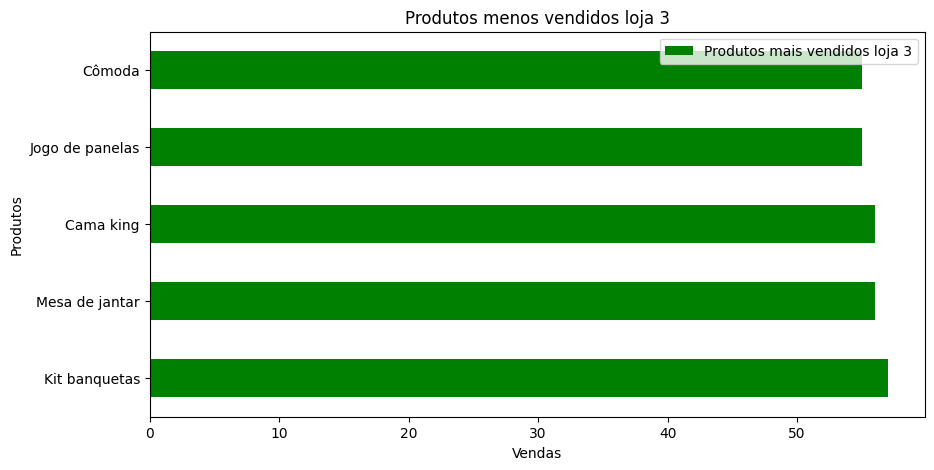

In [264]:
produtos_mais_vendidos_loja3.plot(kind='barh', figsize=(10,5), color='green', title= 'Produtos menos vendidos loja 3')
plt.xlabel('Vendas')
plt.ylabel('Produtos')
plt.show()

Produtos menos vendidos

In [232]:
produtos_menos_vendidos_loja3

,Produtos menos vendidos loja 3
Produto,
Blocos de montar,35
Jogo de copos,36
Mochila,36
Micro-ondas,36
Copo térmico,38


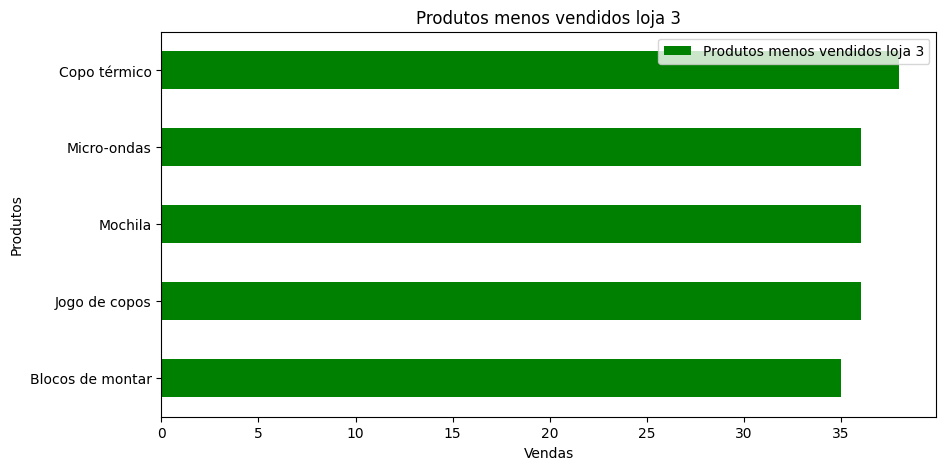

In [272]:
produtos_menos_vendidos_loja3.plot(kind='barh', figsize=(10,5), color='green', title= 'Produtos menos vendidos loja 3')
plt.xlabel('Vendas')
plt.ylabel('Produtos')
plt.show()

###  Calculando o custo médio de frete para cada loja.

In [273]:
media_custo_frete_loja3 = loja3['Frete'].mean()
print(f'Custo médio do frete loja4: R${media_custo_frete_loja3:,.2f}')

Custo médio do frete loja4: R$33.07


# Loja 4

##Conhecendo os dados

### Verificando informações do DataFrame

In [191]:
loja4.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


In [192]:
loja4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2358 non-null   object 
 1   Categoria do Produto    2358 non-null   object 
 2   Preço                   2358 non-null   float64
 3   Frete                   2358 non-null   float64
 4   Data da Compra          2358 non-null   object 
 5   Vendedor                2358 non-null   object 
 6   Local da compra         2358 non-null   object 
 7   Avaliação da compra     2358 non-null   int64  
 8   Tipo de pagamento       2358 non-null   object 
 9   Quantidade de parcelas  2358 non-null   int64  
 10  lat                     2358 non-null   float64
 11  lon                     2358 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.2+ KB


In [193]:
loja4.shape

(2358, 12)

### Estatisticas descritivas

In [194]:
loja4.describe()

,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000
mean,587.149101,31.278997,3.995759,2.896098,-20.494215,-47.107553
std,758.341290,40.373136,1.403063,2.730393,5.433033,4.159156
min,10.170000,0.000000,1.000000,1.000000,-30.170000,-65.100000
25%,71.225000,3.847061,3.000000,1.000000,-22.250000,-48.790000
50%,279.315000,14.614197,5.000000,1.000000,-22.190000,-48.790000
75%,845.577500,44.438533,5.000000,4.000000,-18.100000,-44.380000
max,3869.560000,206.325555,5.000000,18.000000,1.410000,-36.590000


### Valores nulos e duplicados

In [195]:
loja4.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


In [196]:
loja4.duplicated().sum()

np.int64(0)

## Analisando os dados

### Calculando o faturamento total de cada loja.

In [197]:
faturamento_loja4 = loja4['Preço'].sum()
print(f'Faturamento loja4 R${faturamento_loja4:,.2f}')

Faturamento loja4 R$1,384,497.58


###  Calculando a quantidade de produtos vendidos por categoria em cada loja

In [198]:
qtd_vendas_cat_loja4 = loja4['Categoria do Produto'].value_counts()
qtd_vendas_cat_loja4

,count
Categoria do Produto,
moveis,480
eletronicos,451
brinquedos,338
esporte e lazer,277
eletrodomesticos,254
utilidades domesticas,201
livros,187
instrumentos musicais,170


###  Calculando a média das avaliações dos clientes para cada loja.

In [199]:
avaliacao_cliente_loja4 = loja4['Avaliação da compra'].mean()
print(f'{avaliacao_cliente_loja4:.2f}')

4.00


###  Identificando quais produtos foram os mais vendidos e os menos vendidos em cada loja

In [227]:
vendas_por_produto_loja4 = loja4['Produto'].value_counts()

produtos_mais_vendidos_loja4 = vendas_por_produto_loja4.nlargest()
produtos_menos_vendidos_loja4 = vendas_por_produto_loja4.nsmallest()

produtos_mais_vendidos_loja4 = produtos_mais_vendidos_loja4.to_frame(name = 'Produtos mais vendidos loja 4')
produtos_menos_vendidos_loja4 = produtos_menos_vendidos_loja4.to_frame(name = 'Produtos menos vendidos loja 4')

Produtos mais vendidos

In [228]:
produtos_mais_vendidos_loja4

,Produtos mais vendidos loja 4
Produto,
Cama box,62
Faqueiro,59
Dashboards com Power BI,56
Cama king,56
Carrinho controle remoto,55


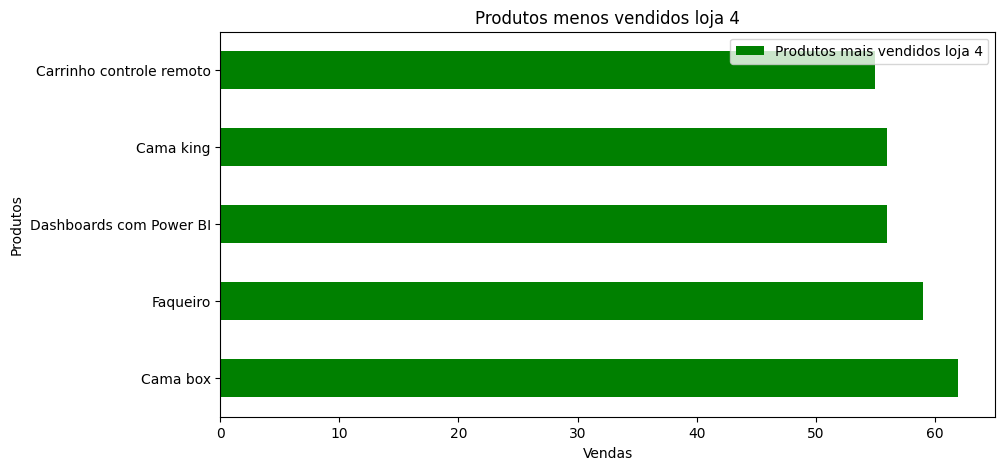

In [265]:
produtos_mais_vendidos_loja4.plot(kind='barh', figsize=(10,5), color='green', title= 'Produtos menos vendidos loja 4')
plt.xlabel('Vendas')
plt.ylabel('Produtos')
plt.show()

Produtos menos vendidos

In [229]:
produtos_menos_vendidos_loja4

,Produtos menos vendidos loja 4
Produto,
Guitarra,33
Guarda roupas,34
Violão,37
Lavadora de roupas,38
Geladeira,38


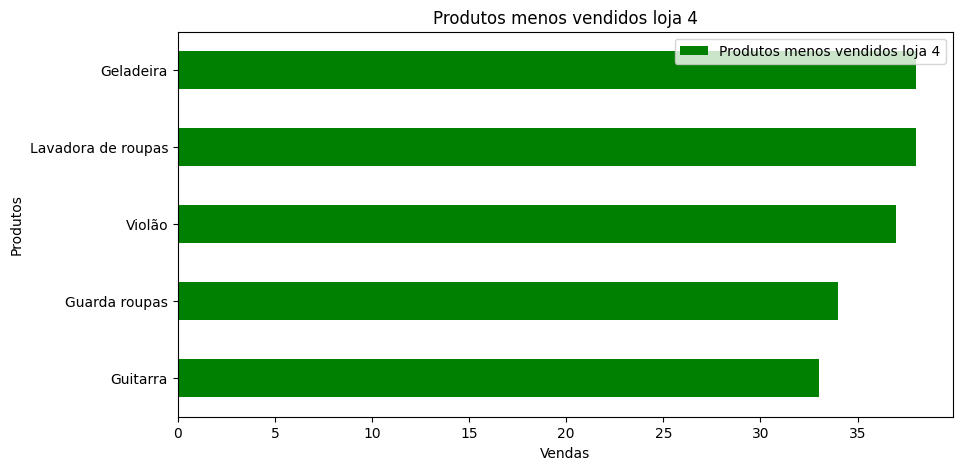

In [266]:
produtos_menos_vendidos_loja4.plot(kind='barh', figsize=(10,5), color='green', title= 'Produtos menos vendidos loja 4')
plt.xlabel('Vendas')
plt.ylabel('Produtos')
plt.show()

###  Calculando o custo médio de frete para cada loja.

In [271]:
media_custo_frete_loja4 = loja4['Frete'].mean()
print(f'Custo médio do frete loja4: R${media_custo_frete_loja4:,.2f}')

Custo médio do frete loja4: R$31.28


# Analises em conjunto

## Comparando faturamento das lojas

Criando um DataFrame com o faturamento de todas as lojas.

In [308]:
faturamento_conjunto = pd.DataFrame({'Loja':['Loja 1','Loja 2','Loja 3','Loja 4'],
                                   'Faturamento':[
                                    faturamento_loja1,
                                    faturamento_loja2,
                                    faturamento_loja3,
                                    faturamento_loja4
]})
faturamento_conjunto.head()

,Loja,Faturamento
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


Gráfico de barras comparando o faturamentos de todas as lojas

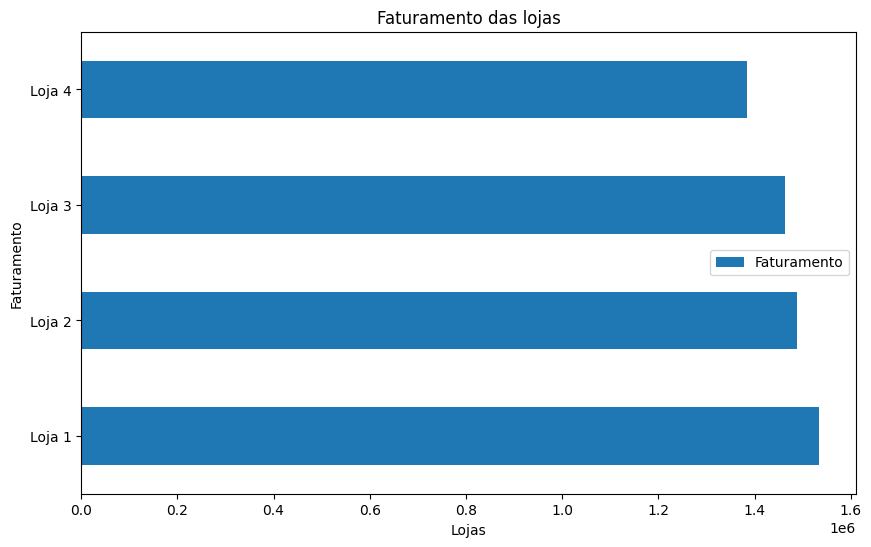

In [336]:
faturamento_conjunto.plot(kind='barh',x='Loja', y='Faturamento', figsize=(10,6), title='Faturamento das lojas')
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.show()

##Comparando a quantidade de produtos vendidos por categoria em cada loja

Criando um DataFrame agrupando as séries contendo os dados dos produtos vendidos por categoria.



In [204]:
df_vendas_por_categoria = pd.concat(
    [qtd_vendas_cat_loja1, qtd_vendas_cat_loja2, qtd_vendas_cat_loja3, qtd_vendas_cat_loja4],
    axis=1
)
df_vendas_por_categoria.columns = ['Loja 1','Loja 2','Loja 3','Loja 4']
df_vendas_por_categoria.head()

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
moveis,465,442,499,480
eletronicos,448,422,451,451
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
esporte e lazer,284,275,277,277


Gráfico de barras agrupadas para comparar a categoria de produtos mais vendidos

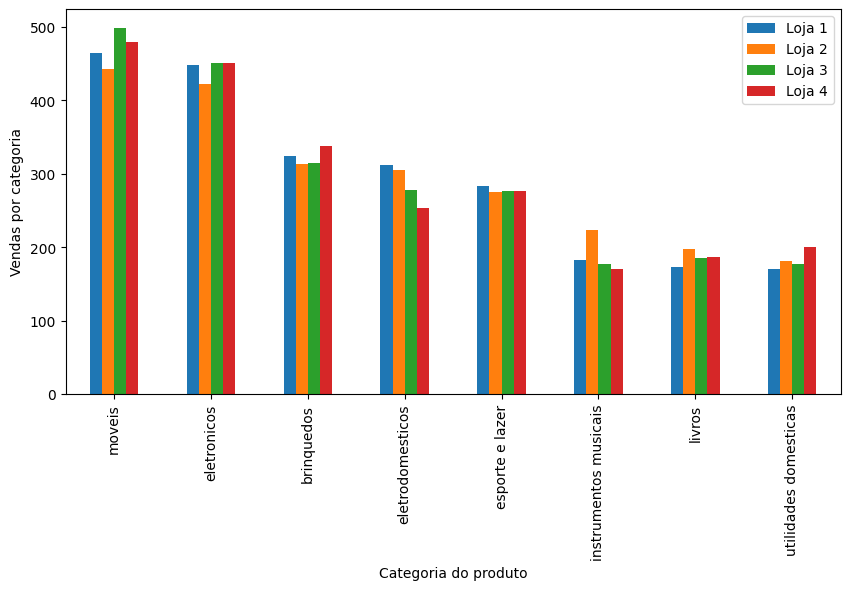

In [341]:
df_vendas_por_categoria.plot(kind='bar', figsize= (10, 5))
plt.xlabel('Categoria do produto')
plt.ylabel('Vendas por categoria')
plt.show()

##Comparando a média das avaliações dos clientes para cada loja.

Criando um DataFrame com as médias de avaliações de todas as lojas

In [306]:
cliente_avaliacao_conjunto = pd.DataFrame({'Loja':['Loja 1','Loja 2','Loja 3','Loja 4'],
                                           'Media avaliação': [avaliacao_cliente_loja1,
                                                         avaliacao_cliente_loja2,
                                                         avaliacao_cliente_loja3,
                                                         avaliacao_cliente_loja4]})
cliente_avaliacao_conjunto.head()

,Loja,Media avaliação
0,Loja 1,3.976685
1,Loja 2,4.037304
2,Loja 3,4.048326
3,Loja 4,3.995759


Gráfico de pontos comparando a média de avaliações entre as lojas.

<Axes: title={'center': 'Média de avaliação por loja'}, xlabel='Media avaliação', ylabel='Loja'>

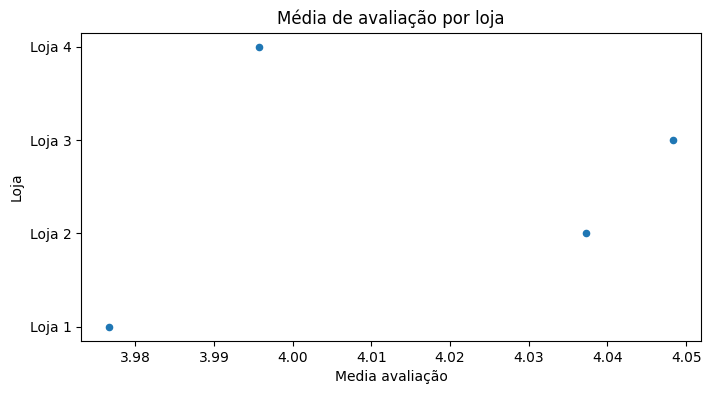

In [305]:
cliente_avaliacao_conjunto.plot(kind='scatter', x = 'Media avaliação', y = 'Loja', figsize=(8,4), title='Média de avaliação por loja')

## Comparando os produtos mais e menos vendidos em cada loja

DataFrame agrupando as séries contendo os dados dos produtos mais vendidos

In [224]:
comparacao_produtos_mais_vendidos= pd.concat([
    loja1['Produto'].value_counts().nlargest(),
    loja2['Produto'].value_counts().nlargest(),
    loja3['Produto'].value_counts().nlargest(),
    loja4['Produto'].value_counts().nlargest()
], axis=1)
comparacao_produtos_mais_vendidos.columns= ['Loja 1','Loja 2','Loja 3','Loja 4']
comparacao_produtos_mais_vendidos.fillna(0, inplace=True)
comparacao_produtos_mais_vendidos.head()


,Loja 1,Loja 2,Loja 3,Loja 4
Produto,,,,
Micro-ondas,60.0,62.0,0.0,0.0
TV Led UHD 4K,60.0,0.0,0.0,0.0
Guarda roupas,60.0,0.0,0.0,0.0
Secadora de roupas,58.0,0.0,0.0,0.0
Cômoda,56.0,0.0,55.0,0.0


Gráfico de barras agrupadas com os produtos mais vendidos.

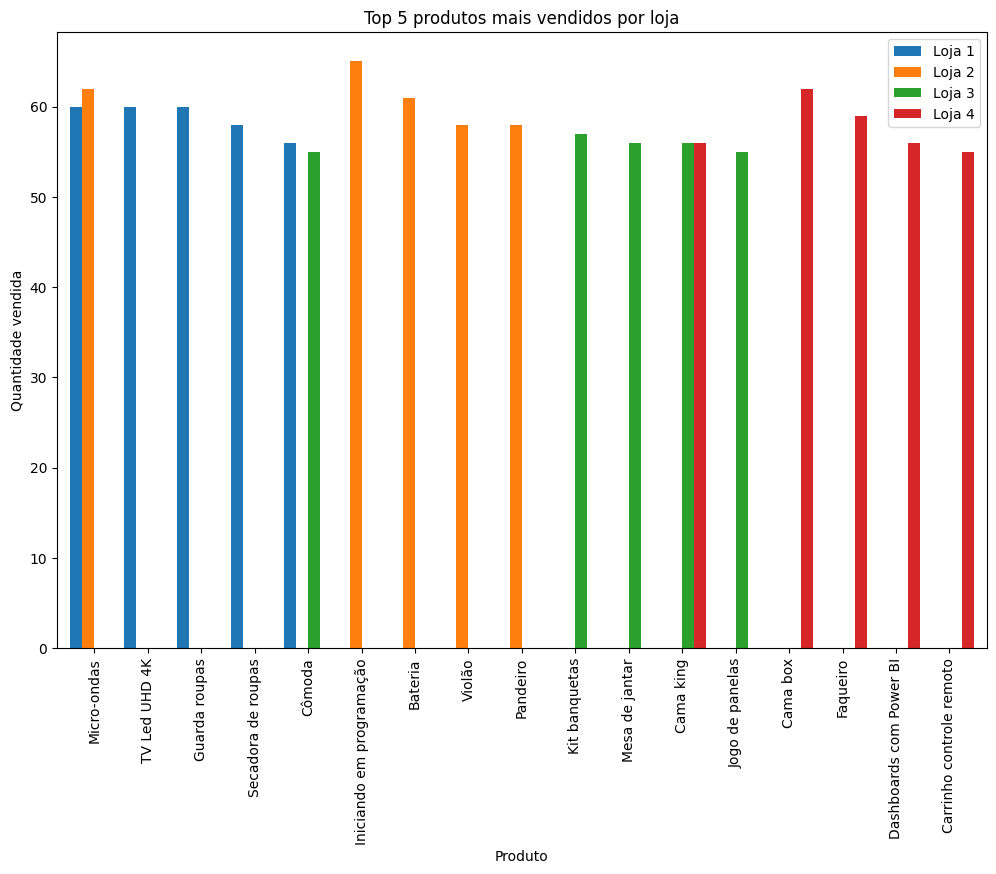

In [225]:
comparacao_produtos_mais_vendidos.plot(kind='bar', figsize= (12, 8),width= 0.9, title= 'Top 5 produtos mais vendidos por loja')
plt.xlabel('Produto')
plt.ylabel('Quantidade vendida')
plt.show()

Criando um DataFrame agrupando as séries contendo os dados dos produtos menos vendidos

In [226]:
comparacao_produtos_menos_vendidos = pd.concat([
    loja1['Produto'].value_counts().nsmallest(),
    loja2['Produto'].value_counts().nsmallest(),
    loja3['Produto'].value_counts().nsmallest(),
    loja4['Produto'].value_counts().nsmallest()
],axis= 1)
comparacao_produtos_menos_vendidos.columns= ['Loja 1','Loja 2','Loja 3','Loja 4']
comparacao_produtos_menos_vendidos.fillna(0, inplace=True)
comparacao_produtos_menos_vendidos.head()

,Loja 1,Loja 2,Loja 3,Loja 4
Produto,,,,
Headset,33.0,0.0,0.0,0.0
Celular ABXY,33.0,0.0,0.0,0.0
Panela de pressão,35.0,0.0,0.0,0.0
Pandeiro,36.0,0.0,0.0,0.0
Mochila,39.0,0.0,36.0,0.0


Criando um gráfico de barras agrupadas com os produtos mais vendidos.

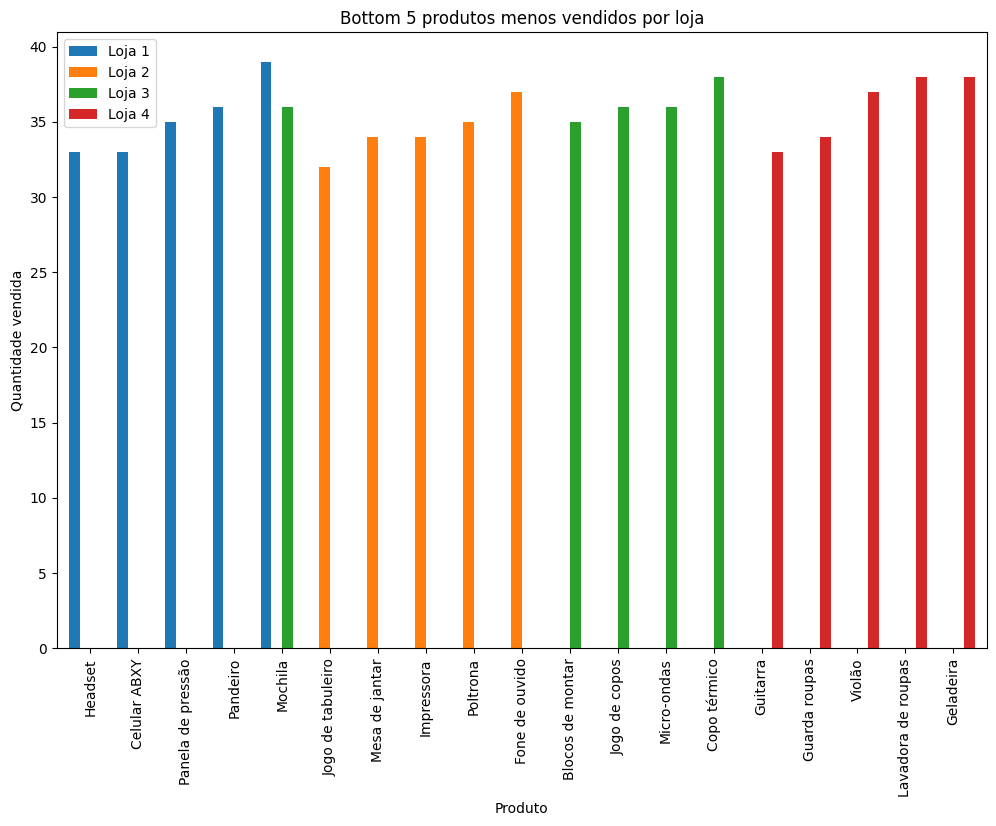

In [223]:
comparacao_produtos_menos_vendidos.plot(kind='bar', figsize=(12,8), width= 0.9, title='Bottom 5 produtos menos vendidos por loja')
plt.xlabel('Produto')
plt.ylabel('Quantidade vendida')
plt.show()

## Comparando o custo médio de frete entre as lojas.

Criando um DataFrame com o custo médio de fretes por loja

In [349]:
media_custo_frete_conjunto = pd.DataFrame({'Loja': ['Loja 1','Loja 2','Loja 3','Loja 4'],
                                           'Custo médio por loja': [media_custo_frete_loja1,
                                                                    media_custo_frete_loja2,
                                                                    media_custo_frete_loja3,
                                                                    media_custo_frete_loja4]})
media_custo_frete_conjunto.head()

,Loja,Custo médio por loja
0,Loja 1,34.691805
1,Loja 2,33.621941
2,Loja 3,33.074464
3,Loja 4,31.278997


Gráfico de colunas comparando o custo médio de fretes por loja

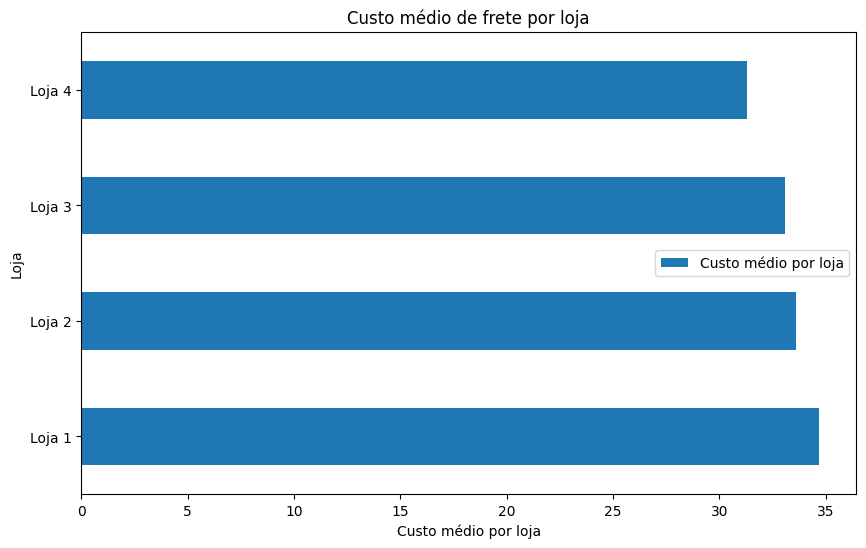

In [352]:
media_custo_frete_conjunto.plot(kind='barh', x = 'Loja', y = 'Custo médio por loja', figsize=(10, 6), title= 'Custo médio de frete por loja')
plt.xlabel('Custo médio por loja')
plt.ylabel('Loja')
plt.show()

# Relatório

 **Objetivo da análise**

---

Neste relatorio tive como objetivo ajudar o Senhor João a decidir **qual loja da sua rede vender**, analisando dados de vendas, desempenho e avaliações de suas 4 lojas.

O objetivo é **identificar a loja com menor eficiência** e apresentar uma **recomendação final baseada nos dados**.
